In [1]:
# A code to generate dataset of 40 rows containing columns (feature1, feature2, feature3, target)

import numpy as np
import pandas as pd

np.random.seed(23) 

# Class 1
mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)
df1 = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 1

# Class 2
mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)
df2 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df2['target'] = 0

# Concatenate the two DataFrames
df = pd.concat([df1, df2], ignore_index=True)

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=23).reset_index(drop=True)

In [2]:
df.head(5)

,feature1,feature2,feature3,target
0,-0.331617,-1.632386,0.619114,1
1,1.010229,1.437830,2.327788,0
2,0.241106,-0.952510,-0.136267,1
3,1.676860,4.187503,-0.080565,0
4,2.823378,-0.332863,2.637391,0


In [3]:
df.isnull().sum()

feature1    0
feature2    0
feature3    0
target      0
dtype: int64

In [5]:
df.duplicated().sum()

0

## Visualization of data

In [6]:
import plotly.express as px

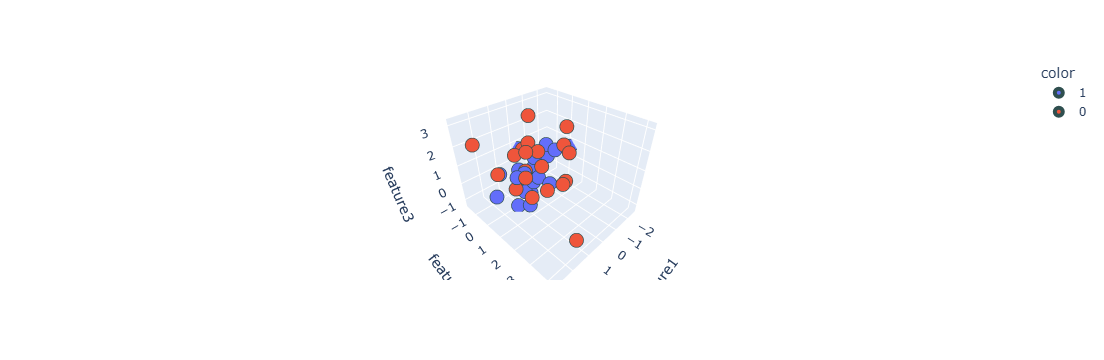

In [15]:
fig = px.scatter_3d(df, 
                    x = df['feature1'],
                    y = df['feature2'],
                    z = df['feature3'],
                    color = df['target'].astype('str')
                   )

fig.update_traces(marker = dict(size = 8,
                               line = dict(width = 4,
                                          color = 'DarkSlateGrey')),
                 selector = dict(mode = 'markers'))

fig.show()

## Apply the PCA step by step

In [17]:
# Standardization (Mean Centering)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df.iloc[:, 0:3] = scaler.fit_transform(df.iloc[:, 0:3])

In [37]:
# Find the covariance matrix

covariance_matrix = np.cov([df['feature1'], df['feature2'], df['feature3']])
covariance_matrix

array([[1.02564103, 0.20478114, 0.080118  ],
       [0.20478114, 1.02564103, 0.19838882],
       [0.080118  , 0.19838882, 1.02564103]])

In [39]:
# Find the eigen values and eigen vectors

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

eigen_values
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [41]:
# Select top 2 features 

pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [47]:
# Find the dot product of transposed of Principle Components with xi (All elements)

transposed_df = np.dot(df.iloc[:, 0:3], pc.T)
new_df = pd.DataFrame(transposed_df, columns = ['PC1', 'PC2'])

new_df['target'] = df['target'].values

new_df.head()

,PC1,PC2,target
0,1.726114,0.492511,1
1,-0.220797,-1.441911,0
2,0.688605,0.658084,1
3,-3.367715,-0.254627,0
4,0.227326,-2.669841,0


## Visualization

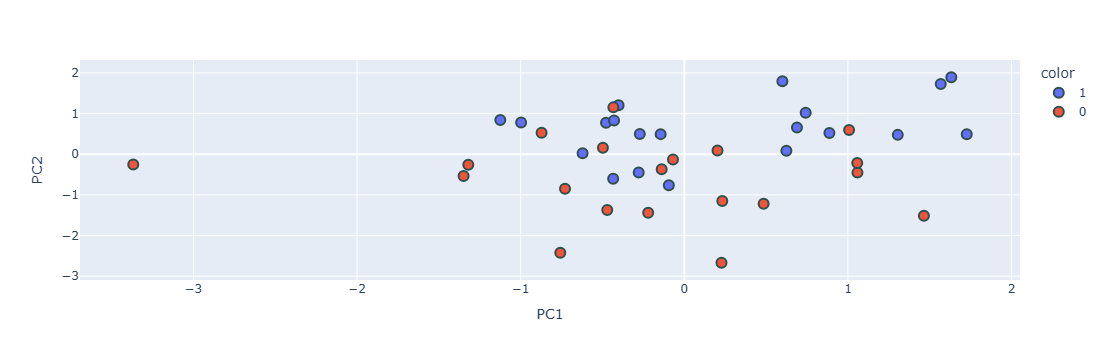

In [50]:
fig = px.scatter(new_df,
                x = new_df['PC1'],
                y = new_df['PC2'],
                color = new_df['target'].astype('str')
                )

fig.update_traces(marker = dict(size = 10,
                               line = dict(width = 2,
                                          color = 'DarkSlateGrey')),
                 selector = dict(mode = 'markers'))

fig.show()